In [ ]:
# All installations
# !pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample data (same for all examples)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# print(X[:5], y_true[:5])

## 1. Basic k-means

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)


[[-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]]


## 2. Predict cluster labels

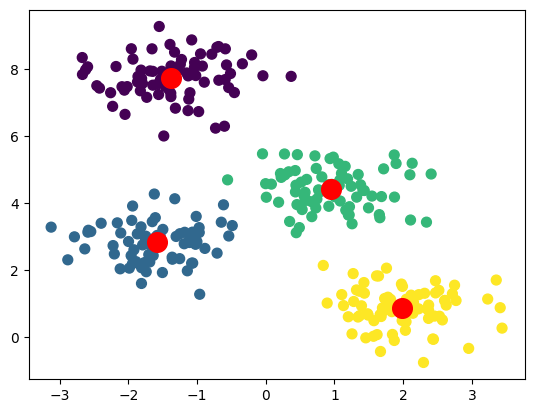

In [16]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()


## 3. Manual Initial Centroids

In [17]:
init_centroids = np.array([[2, 1], [5, 5], [-1, -1], [3, 3]])
kmeans = KMeans(n_clusters=4, init=init_centroids, n_init=1)
kmeans.fit(X)

# n_init signifies

KMeans(init=array([[ 2,  1],
       [ 5,  5],
       [-1, -1],
       [ 3,  3]]),
       n_clusters=4, n_init=1)

## 4: Increased n_init for stability
Use-case: Improve robustness to random initialization

In [18]:
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
kmeans.fit(X)
# the algo is run 20 times so that we may not be stuck in local minima

KMeans(n_clusters=4, n_init=20, random_state=42)

## 5. Control Maximum Iterations
Use-case: Avoid long-running KMeans on large datasets

In [19]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=42)
kmeans.fit(X)


KMeans(max_iter=100, n_clusters=4, random_state=42)

## 6: Custom Initialization Method (k-means++ vs random)
Use-case: Testing performance between init strategies

In [20]:
kmeans = KMeans(n_clusters=4, init='random', n_init=10)
kmeans.fit(X)


KMeans(init='random', n_clusters=4, n_init=10)

## 7: Using .transform and .inertia_
Use-case: Access distance to centroids and clustering cost

In [21]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
distances = kmeans.transform(X)
print("Inertia:", kmeans.inertia_)
print("Distance:", distances)

# .transform -> the distance of each sample to each cluster center.
# .inertia_ -> the sum of squared distances of samples to their closest cluster center.

Inertia: 212.00599621083484
Distance: [[2.28549887 6.03646705 1.7094301  2.51886398]
 [3.81169814 0.34643087 7.37095923 4.58199238]
 [0.71089317 3.66567611 4.31202584 3.55708828]
 ...
 [0.52394355 3.69298946 3.97975937 2.64602851]
 [3.42159694 1.74312426 7.10882992 5.33123667]
 [3.2095226  5.02146555 4.21724302 0.22240389]]


## 8: Mini-batch KMeans (large data)
Use-case: Faster clustering on large datasets

In [22]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=100)
mb_kmeans.fit(X)


MiniBatchKMeans(batch_size=100, n_clusters=4)

## 9: Reproducibility and Verbose
Use-case: Debugging and consistency across runs

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, verbose=1)
kmeans.fit(X)


Initialization complete
Iteration 0, inertia 372.7584962032832.
Iteration 1, inertia 212.600460915319.
Iteration 2, inertia 212.00599621083484.
Converged at iteration 2: strict convergence.


KMeans(n_clusters=4, random_state=42, verbose=1)

## 10: KMeans in a Pipeline
Use-case: Integrating KMeans with preprocessing

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=4))
pipeline.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4))])